# Tugas Analisis Multimedia: Audio, Gambar, Video

**Mata Kuliah:** Sistem & Teknologi Multimedia  
**Nama:** A. Edwin Krisandika Putra  
**NIM:** 122140003

---

## Deskripsi Tugas

Tugas ini bertujuan untuk memahami representasi dasar data multimedia (audio, gambar, dan video) melalui praktik langsung memuat data, visualisasi, dan ekstraksi informasi fundamental. Anda akan bekerja dengan tiga jenis media berbeda untuk menganalisis karakteristik temporal (audio), spasial (gambar), dan spatio-temporal (video).

Fokus tugas adalah pada pemahaman konsep dasar representasi multimedia dan kemampuan interpretasi hasil visualisasi, **bukan** pada manipulasi atau transformasi lanjutan data multimedia.

---

## ⚠️ CATATAN PENTING: PRESENTASI ACAK & KEJUJURAN AKADEMIK

**Sebagian mahasiswa akan dipilih secara ACAK untuk presentasi singkat** (5-10 menit) menjelaskan kode dan interpretasi hasil mereka. Jika Anda:
- Tidak mampu menjelaskan kode yang Anda kumpulkan
- Hanya menyalin-tempel tanpa pemahaman
- Bergantung sepenuhnya pada AI tanpa memahami konsep

**Maka nilai tugas Anda akan diberikan 0 (nol).**

Gunakan referensi dan AI sebagai alat bantu pembelajaran, tetapi pastikan Anda memahami setiap baris kode dan dapat menjelaskan logika di baliknya.

In [3]:
# Import Library (Satu-satunya sel kode dalam template ini)
import numpy as np
import matplotlib.pyplot as plt
import librosa
import soundfile as sf
from PIL import Image
import cv2
from IPython.display import Audio, HTML, display
import os

# Set matplotlib untuk menampilkan plot inline
%matplotlib inline

# Tampilkan versi library untuk dokumentasi
print("Library versions:")
print(f"NumPy: {np.__version__}")
import matplotlib
print(f"Matplotlib: {matplotlib.__version__}")
print(f"Librosa: {librosa.__version__}")
print(f"OpenCV: {cv2.__version__}")

# Tambahkan import lain jika diperlukan saat mengerjakan tugas

Library versions:
NumPy: 2.2.6
Matplotlib: 3.10.6
Librosa: 0.11.0
OpenCV: 4.12.0


# Pendahuluan

## Apa itu Data Multimedia?

Data multimedia adalah informasi yang dikodekan dalam berbagai format untuk merepresentasikan dunia nyata:

- **Audio (1D)**: Sinyal satu dimensi yang berubah terhadap waktu
  - Contoh: musik, suara, speech
  - Representasi: amplitudo vs waktu
  
- **Gambar (2D)**: Matriks nilai intensitas dalam ruang dua dimensi
  - Contoh: foto, ilustrasi, grafik
  - Representasi: intensitas pixel pada koordinat (x,y)
  
- **Video (2D + Waktu)**: Rangkaian frame (gambar) yang ditampilkan berurutan
  - Contoh: film, rekaman, animasi
  - Representasi: frame berubah terhadap waktu dengan frame rate tertentu

## Tujuan Tugas

Memahami representasi dasar dan teknik visualisasi fundamental untuk setiap jenis media multimedia, termasuk:
- Cara memuat dan membaca file multimedia
- Ekstraksi informasi metadata yang penting
- Visualisasi yang informatif dan mudah dipahami
- Interpretasi hasil analisis secara kontekstual

## Cara Kerja

1. Isi setiap bagian sesuai instruksi yang diberikan
2. Tambahkan sel kode di tempat yang ditandai dengan "TODO"
3. Berikan interpretasi dan analisis setelah setiap visualisasi
4. Pastikan semua plot memiliki judul, label, dan keterangan yang jelas

# Bagian A — Audio

### A1. Deskripsi Data

**TODO:** Jelaskan audio yang akan Anda analisis:
- Jenis audio: Musik
- Sumber: [TheFatRat - Fly Away feat. Anjulie](https://www.youtube.com/watch?v=cMg8KaMdDYo&list=RDcMg8KaMdDYo&start_radio=1)
- Format file: WAV
- Alasan pemilihan: Karena musiknya gratis digunakan

**Path file:** `data\TheFatRat - Fly Away feat. Anjulie.wav`

---

### A2. TODO: Muat & Metadata

**Instruksi:**
Tulis kode untuk memuat file audio dan menampilkan metadata dasar:
- Sample rate (Hz)
- Durasi (detik)
- Jumlah kanal (mono/stereo)
- Jumlah total sampel

Kode di bawah ini akan memuat audio (berbentuk WAV) yang akan digunakan untuk melakukan analisis audio. Load dan metadata akan menggunakan librosa.

In [9]:
# Tentukan folder dan nama file audio
file_path = os.path.join('data', 'TheFatRat - Fly Away feat. Anjulie.wav')

# Muat file audio
y, sr = librosa.load(file_path, sr=None, mono=False)  # sr=None agar gunakan sample rate asli

# Metadata
sample_rate = sr
duration = librosa.get_duration(y=y, sr=sr)
channels = 1 if y.ndim == 1 else y.shape[0]
total_samples = y.shape[-1]

# Output
print(f"File audio : {file_path}")
print(f"Sample rate: {sample_rate} Hz")
print(f"Durasi     : {duration:.2f} detik")
print(f"Jumlah kanal: {'Mono' if channels == 1 else 'Stereo'} ({channels})")
print(f"Total sampel: {total_samples}")

File audio : data\TheFatRat - Fly Away feat. Anjulie.wav
Sample rate: 44100 Hz
Durasi     : 194.30 detik
Jumlah kanal: Stereo (2)
Total sampel: 8568832


---

### A3. TODO: Waveform

**Instruksi:**
Plot waveform audio dengan:
- Sumbu X: waktu (detik)
- Sumbu Y: amplitudo
- Judul dan label sumbu yang jelas

**Analisis yang diperlukan:**
Dari audio yang dipakai, telah terbentuk dua waveform yaitu waveform untuk channel kiri dan channel kanan. Panjang waveform yang terbentuk juga sama dengan durasi dari audio. Tinggi waveform yang terbentuk (sumbu y) dapat diukur dengan amplitudo, semakin kecil amplitudo, semakin pelan suara audio begitu juga sebaliknya, semakin besar amplitudo (range di visualisasi nya besar) semakin keras suara audio. 

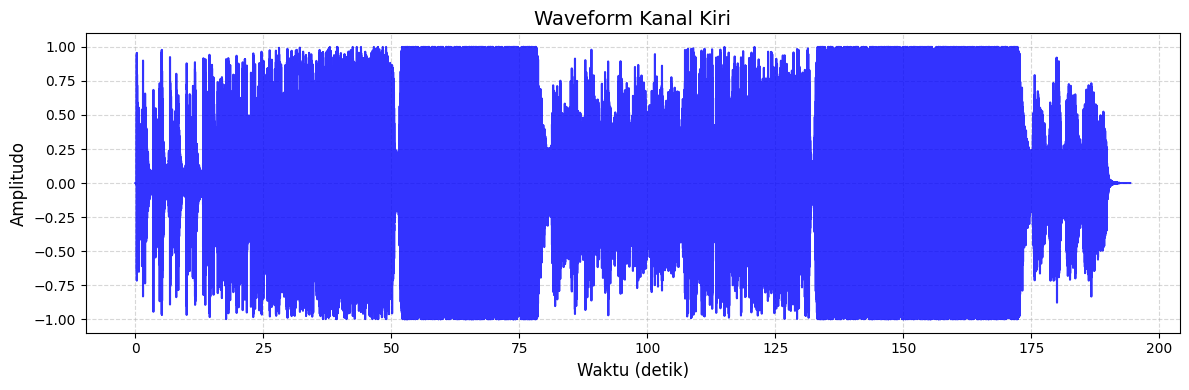

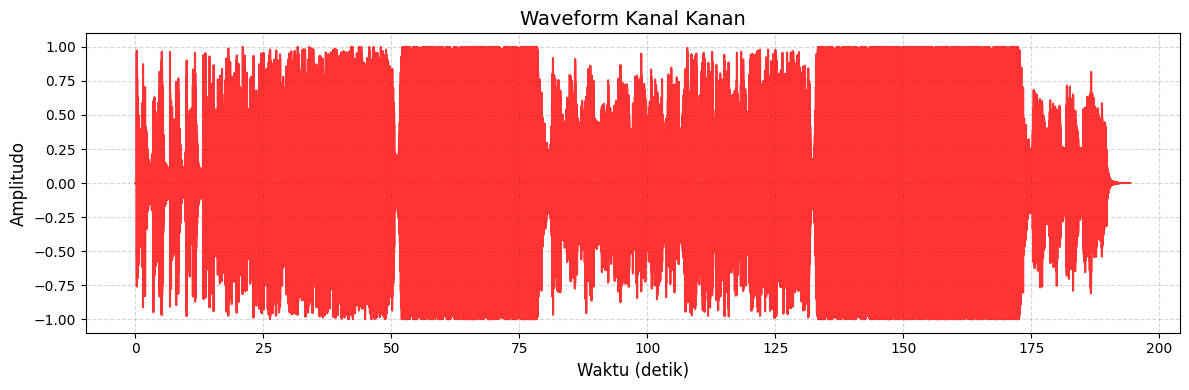

In [14]:
# Jika mono, ubah bentuk array supaya konsisten
if y.ndim == 1:
    y = np.expand_dims(y, axis=0)

# Buat array waktu
time = np.linspace(0, y.shape[1] / sr, num=y.shape[1])

# Plot tiap kanal
# Plot kanal kiri
plt.figure(figsize=(12, 4))
plt.plot(time, y[0], color="blue", alpha=0.8)
plt.title(f"Waveform Kanal Kiri", fontsize=14)
plt.xlabel("Waktu (detik)", fontsize=12)
plt.ylabel("Amplitudo", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# Plot kanal kanan
if y.shape[0] > 1:
    plt.figure(figsize=(12, 4))
    plt.plot(time, y[1], color="red", alpha=0.8)
    plt.title(f"Waveform Kanal Kanan", fontsize=14)
    plt.xlabel("Waktu (detik)", fontsize=12)
    plt.ylabel("Amplitudo", fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()


---

### A4. TODO: Spectrogram log-dB

**Instruksi:**
Hitung STFT dan tampilkan spectrogram dalam skala log-dB:
- Gunakan parameter standar (n_fft=1024, hop_length=256)
- Tampilkan dengan colorbar
- Label sumbu: waktu (detik) dan frekuensi (Hz)

**Analisis yang diperlukan:**
Pada spectogram, kita mendapatkan informasi yang berbeda dari waveform. Pada waveform, kita mendapatkan informasi seberapa besar simpangan nilai amplitudo sepanjang audio. Pada spectogram, ktia mendapatkan informasi berapa frekuensi (dalam bentuk hz) pada setiap waktunya sepanjang audio. Frekuensi ini juga digunakan untuk menentukan karakteristik audio. Pada audio yang dipakai, frekuensinya terlihat terang di frekuensi bawah yang menandakan kalau suara dengan frekuensi rendah (seperti bass) dapat terdengar cukup jelas. Pada beberapa bagian juga terlihat kalau frekuensi tinggi lebih terang, dikarenakan terdapat vokal manusia yang bernyanyi.

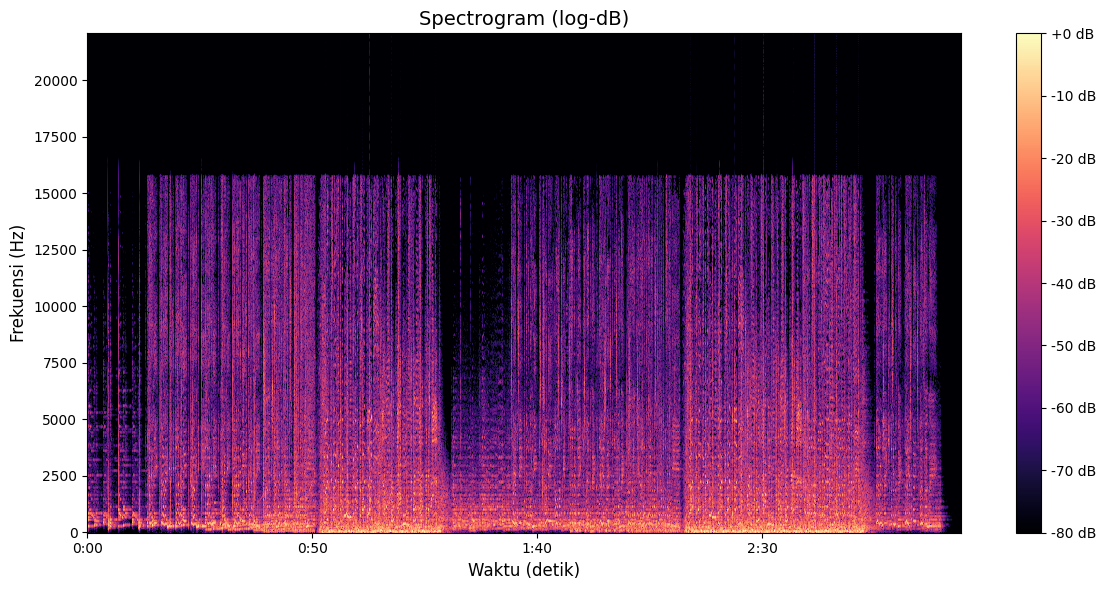

In [23]:
if channels > 1:
    y_mono = librosa.to_mono(y)
else:
    y_mono = y

# Hitung STFT
D = librosa.stft(y_mono, n_fft=1024, hop_length=256)

# Konversi magnitude ke skala log-dB
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

# Plot spectrogram
plt.figure(figsize=(12, 6))
librosa.display.specshow(
    S_db,
    sr=sr,
    hop_length=256,
    x_axis="time",
    y_axis="hz"
)
plt.colorbar(format="%+2.0f dB")
plt.title(f"Spectrogram (log-dB)", fontsize=14)
plt.xlabel("Waktu (detik)", fontsize=12)
plt.ylabel("Frekuensi (Hz)", fontsize=12)
plt.tight_layout()
plt.show()

---

### A5. TODO: MFCC

**Instruksi:**
Hitung dan tampilkan minimal 13 koefisien MFCC sebagai heatmap:
- Sumbu X: waktu (frame)
- Sumbu Y: koefisien MFCC (1-13)
- Gunakan colorbar dan judul yang jelas

**Analisis yang diperlukan:**
Dari pola MFCC yang terlihat, sepertinya polanya berubah ubah. Warna di heatmap menujukkan nilai koefisien. Heatmap menunjukkan warna yang agak berubah ubah, hal ini disebabkan oleh pola atau struktur suara yang berubah. Dapat dilihat misal pada bagian 1.10 - 1.20, jika didengarkan audio aslinya, terdapat perubahan vokal dari sebelumnya.

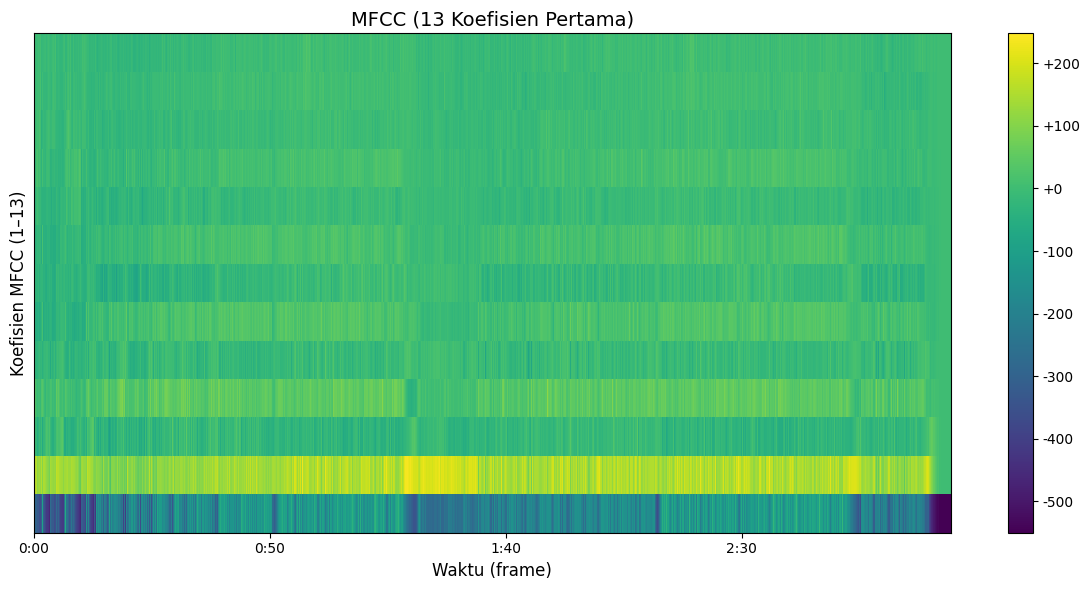

In [24]:
# Muat audio mono
y, sr = librosa.load(file_path, sr=None, mono=True)

# Hitung MFCC (13 koefisien pertama)
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13, n_fft=1024, hop_length=256)

# Plot heatmap MFCC
plt.figure(figsize=(12, 6))
librosa.display.specshow(
    mfccs,
    x_axis="time",
    sr=sr,
    hop_length=256,
    cmap="viridis"
)
plt.colorbar(format="%+2.0f")
plt.title(f"MFCC (13 Koefisien Pertama)", fontsize=14)
plt.xlabel("Waktu (frame)", fontsize=12)
plt.ylabel("Koefisien MFCC (1–13)", fontsize=12)
plt.tight_layout()
plt.show()

---

### A6. Analisis Ringkas (Wajib)

**Jawab pertanyaan berikut:**

1. **Perbedaan insight:** Apa perbedaan informasi yang didapat dari waveform versus spectrogram?

   *Jawaban Anda:* Waveform dapat digunakan untuk melihat nilai amplitudo di sepanjang audio. Nilai amplitudo ini dapat kita gunakan untuk menentukan di bagian mana audio memiliki suara keras dan suara kecil. Spectogram dapat digunakan untuk melihat nilai frekuensi di sepanjang audio. Di sini juga bisa diambil misalnya kapan frekuensi rendah atau frekuensi tinggi dominan di audio tersebut.

2. **Pembelajaran dari MFCC:** Apa yang Anda pelajari dari visualisasi MFCC audio ini?

   *Jawaban Anda:* Dari visualisasi heatmap, dapat diketahui bagaimana perubahan pola atau struktur suara pada audio yang digunakan. Warna heatmap juga beberapa kali berubah yang menandakan adanya suatu perubahan tersebut.

# Bagian B — Gambar

### B1. Deskripsi Data

**TODO:** Jelaskan gambar yang akan Anda analisis:
- Jenis gambar: Screenshot
- Sumber: Screenshot dari game The Hunter
- Format file: PNG
- Alasan pemilihan: Karena screenshot ini yang ketemu saat saya cari gambar di device.

**Path file:** `data\The Hunter.jpg` 

---

### B2. TODO: Baca & Tampilkan (RGB)

**Instruksi:**
Baca gambar dan tampilkan dengan benar dalam format RGB:
- Pastikan konversi warna benar (ingat perbedaan BGR vs RGB di OpenCV)
- Berikan judul yang deskriptif
- Hilangkan axis untuk tampilan yang bersih

**Analisis yang diperlukan:**
Jelaskan gambar secara ringkas (objek dominan, kondisi pencahayaan, komposisi warna).

Hasil load gambar screenshot. Objek yang paling dominan di dalam gambar tersebut adalah tenda dan tumpukan kayu (firecamp). Kondisi pencahayaannya menujukkan cahaya di siang hari dengan cahaya utama adalah matahari yang datang dari sisi kiri belakang. Komposisi warna mendominasi warna warm, kecoklatan dari tanah, ranting, pohon. Ada juga warna hijau dari terpal dan pohon. Warna kuning dan oranye dari rumput kering dan daun. Ada juga warna merah yang terdapat pada firecamp.

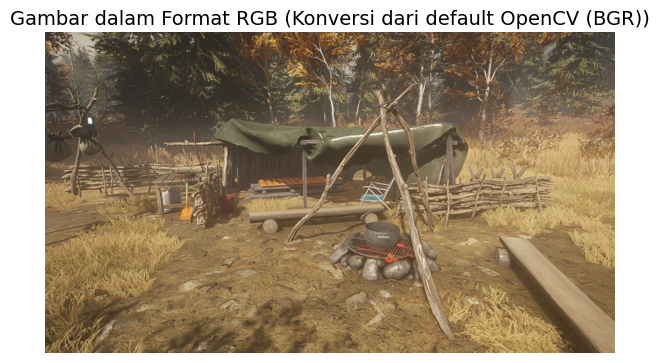

In [33]:
# Baca gambar dengan OpenCV (default: BGR)
file_path = os.path.join('data', 'The Hunter.jpg')
img_bgr = cv2.imread(file_path)
# Konversi ke RGB
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# Tampilkan gambar
plt.figure(figsize=(6, 6))
plt.imshow(img_rgb)
plt.title("Gambar dalam Format RGB (Konversi dari default OpenCV (BGR))", fontsize=14)
plt.axis("off")  # Hilangkan axis
plt.tight_layout()
plt.show()


---

### B3. TODO: Informasi Dasar

**Instruksi:**
Tampilkan informasi metadata gambar:
- Dimensi (Height × Width)
- Jumlah kanal
- Tipe data (dtype)
- Mode warna (jika relevan)
- Ukuran file dalam memori

**Analisis yang diperlukan:**
Jelaskan mengapa informasi ini penting untuk tahap preprocessing atau analisis lanjutan.

Informasi informasi tersebut penting karena informasinya dapat digunakan untuk preprocessing gambar lanjutan. Misal dimensi itu dapat digunakan untuk normalisasi gambar. Jumlah kanal diketahui ada 3 kanal dan mode warna RGB, bukan abu abu atau 1 kanal.

In [34]:
img = cv2.imread(file_path)

# Metadata
height, width, channels = img.shape
dtype = img.dtype
mode = "Grayscale" if channels == 1 else "RGB" if channels == 3 else f"{channels} channels"

# Ukuran file dalam memori (byte)
memory_size = img.nbytes

# Output
print(f"File: {file_path}")
print(f"Dimensi       : {height} × {width}")
print(f"Jumlah kanal  : {channels}")
print(f"Tipe data     : {dtype}")
print(f"Mode warna    : {mode}")
print(f"Ukuran memori : {memory_size / 1024:.2f} KB")

File: data\The Hunter.jpg
Dimensi       : 1080 × 1920
Jumlah kanal  : 3
Tipe data     : uint8
Mode warna    : RGB
Ukuran memori : 6075.00 KB



---

### B4. TODO: Histogram Warna

**Instruksi:**
Tampilkan histogram distribusi intensitas untuk channel R, G, B:
- Range: 0-255
- Plot terpisah atau overlay dengan warna sesuai channel
- Label sumbu: intensitas pixel dan frekuensi
- Legend yang jelas

**Analisis yang diperlukan:**
Analisis: channel mana yang dominan? Bagaimana kontras gambar? Seperti apa sebaran intensitasnya?

Channel yang paling dominan adalah channel biru. Channel biru terlihat memuncak khususnya di sekitar nilai 50 - 100, tapi warna ini termasuk ke intensitas rendah jadi warna birunya lebih ke warna tua (gelap). Kontras gambarnya memiliki rentang dinamis yang cukup luas, dapat dilihat pada gambar asli ada pixel yang gelap (intensitas rendah) hingga sangat terang. Hal ini dapat dilihat dari kurva juga, ketiga kanal menyebar hampir di seluruh intensitas. Sebaran intensitasnya lebih merata pada hijau dan merah dibandingkan dengan biru. Jika dilihat dari gambar, distribusi intensitasnya bervariasi dengan warna cenderung hijau (background, pohon, tenda) dan kanal merah mengindikasikan bahwa gambar mempunyai karakteristik warm. Sebaran intensitas biru sangat tinggi di bagian kiri di bawah 100. Hal ini menunjukkan kalau dominasi warna gelap ke agak gelap yang kebiruan.

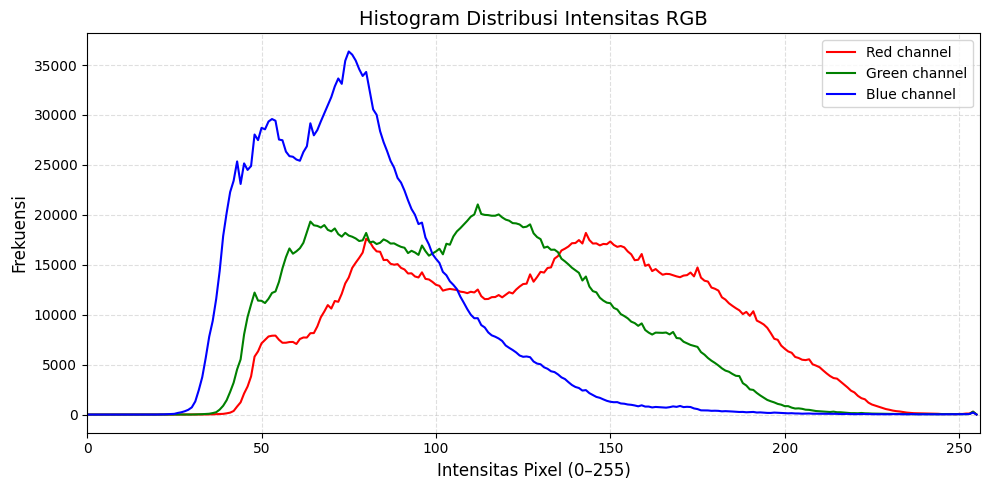

In [36]:
# Baca gambar (OpenCV default BGR)
img_bgr = cv2.imread(file_path)

# Konversi ke RGB
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# Hitung histogram tiap channel
colors = ("r", "g", "b")
channel_names = ("Red", "Green", "Blue")

plt.figure(figsize=(10, 5))

for i, color in enumerate(colors):
    hist = cv2.calcHist([img_rgb], [i], None, [256], [0, 256])
    plt.plot(hist, color=color, label=f"{channel_names[i]} channel")
    plt.xlim([0, 256])

plt.title(f"Histogram Distribusi Intensitas RGB", fontsize=14)
plt.xlabel("Intensitas Pixel (0–255)", fontsize=12)
plt.ylabel("Frekuensi", fontsize=12)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


---

### B5. Analisis Ringkas (Wajib)

**Jawab pertanyaan berikut:**

**Relasi histogram dengan kesan visual:** Apa hubungan antara pola histogram yang Anda lihat dengan kesan visual gambar (terang/gelap, warna dominan, kontras)?

*Jawaban Anda:* Dari pola histogram yang terbentuk setelah melakukan olah gambar, kita dapat menentukan warna apa yang dominan, bagaimana sebaran warna tersebut (intensitas tinggi berarti warna terang dan sebaliknya). Kita bisa melihat bahwa warna biru di gambar tidak terlalu kelihatan karena warna biru di pola histogram hanya cenderung di warna gelap. Begitu juga untuk kanal hijau dan merah, warnanya menyebar di sekitar gambar seperti pohon pohon, tenda, rumput (campuran hijau dan merah) dan perpaduan warna tersebut yang membuat gambar menjadi warm (kecoklatan).

# Bagian C — Video

### C1. Deskripsi Data

**TODO:** Jelaskan video yang akan Anda analisis:
- Jenis video: Gameplay Cyberpunk 2077
- Sumber: [Cyberpunk 2077 - Cinematic Walk - Nvidia RTX 4090](https://www.youtube.com/shorts/CdPukZvHNKs)
- Durasi target: 12 detik
- Alasan pemilihan: Karena kualitas grafik game tersebut yang sangat realistik dan warna yang bervariasi di dalam video tersebut.

**Path file:** `data\Cyberpunk 2077 Environment.mp4`

---

### C2. TODO: Baca & Metadata

**Instruksi:**
Baca video dengan OpenCV dan tampilkan metadata:
- Resolusi (Width × Height)
- Frame rate (fps)
- Jumlah total frame
- Durasi (detik)
- Klasifikasi resolusi (HD, Full HD, 4K, dll.)

**Analisis yang diperlukan:**
Jelaskan pentingnya parameter-parameter tersebut untuk analisis video atau aplikasi tertentu.

Parameter ini penting karena informasi ini dapat digunakan untuk menentukan detail visual, semakin tinggi resolusinya semakin jelas gambarnya, frame rate mengukur berapa banyak gambar (frame) yang ditampilkan setiap detik, yang memengaruhi seberapa halusnya video (semakin sedikit fps semakin patah patah video). Jumlah total frame adalah jumlah gambar yang ada yang ditampilkan berurutan membentuk video. Durasi video menunjukkan lamanya waktu putar. Klasifikasi resolusi seperti HD dan FULL HD memudahkan supaya kita dapat mengkategorikan kualitas video. Semua parameter penting untuk analisis video karena memengaruhi ukuran file, kebutuhan parameter proses dalam koding, misal video 4K perlu lebih banyak komputasi dan storage kalau dibandingkan dengan video HD. Pada aplikasi tertentu misalnya seperti capcut, parameter ini juga bergnua saat mengedit video dan pemilihan settingan (misalnya canvas yang dipakai dan opsi export video).

In [37]:
import cv2
import os

# Tentukan folder dan nama file video
file_path = os.path.join('data', 'Cyberpunk 2077 Environment.mp4')

# Buka video
cap = cv2.VideoCapture(file_path)

if not cap.isOpened():
    print("Gagal membuka file video.")
else:
    # Ambil metadata dasar
    width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps    = cap.get(cv2.CAP_PROP_FPS)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    # Hitung durasi
    duration = total_frames / fps if fps > 0 else 0

    # Klasifikasi resolusi
    if width == 1280 and height == 720:
        resolution_class = "HD (720p)"
    elif width == 1920 and height == 1080:
        resolution_class = "Full HD (1080p)"
    elif width == 2560 and height == 1440:
        resolution_class = "2K (1440p)"
    elif width == 3840 and height == 2160:
        resolution_class = "4K (2160p)"
    elif width == 7680 and height == 4320:
        resolution_class = "8K (4320p)"
    else:
        resolution_class = f"Custom ({width}x{height})"

    # Cetak hasil
    print(f"File video   : {file_path}")
    print(f"Resolusi     : {width} × {height}")
    print(f"Frame rate   : {fps:.2f} fps")
    print(f"Total frame  : {total_frames}")
    print(f"Durasi       : {duration:.2f} detik")
    print(f"Klasifikasi  : {resolution_class}")

# Lepas video
cap.release()

File video   : data\Cyberpunk 2077 Environment.mp4
Resolusi     : 1080 × 1920
Frame rate   : 60.00 fps
Total frame  : 740
Durasi       : 12.33 detik
Klasifikasi  : Custom (1080x1920)


---

### C3. TODO: Tampilkan 3 Frame (Awal–Tengah–Akhir)

**Instruksi:**
Ambil dan tampilkan 3 frame representatif:
- Frame pertama (index 0)
- Frame tengah (index ~total_frame/2)
- Frame terakhir (index total_frame-1)
- **Konversi BGR→RGB** sebelum ditampilkan
- Subplot dengan judul frame dan timestamp

**Analisis yang diperlukan:**
Deskripsikan perbedaan visual antar frame dan apa yang dapat dipelajari dari sampel frame ini.

Pada frame pertama, menujukkan kalau kamera berada di tengah jalan dengan mobil berada di depan kamera (karakter) dan beberapa pejalan kaki di pinggir jalan. Pada frame kedua, kamera menyorot ke sebuah pemandangan dan terdapat beberapa objek yaitu polisi, mobil polisi dan garis polisi dengan polisi tersebut sedang menginvestigasi sesuatu. Pada frame terakhir, terlihat kamera (karakter) berada di pinggir jalan dan menyorot ke arah jalan, terdapat beberapa mobil yang sedang berhenti.

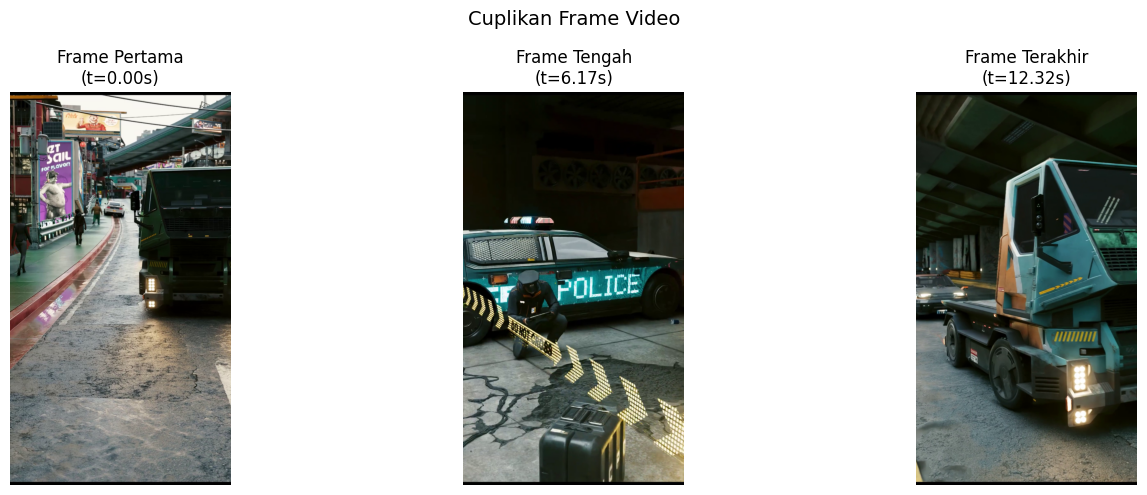

In [38]:
# Buka video
cap = cv2.VideoCapture(file_path)

if not cap.isOpened():
    print("Gagal membuka file video.")
else:
    # Ambil metadata dasar
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    fps = cap.get(cv2.CAP_PROP_FPS)

    # Indeks frame yang akan diambil
    frame_indices = [0, total_frames // 2, total_frames - 1]
    frame_titles = ["Frame Pertama", "Frame Tengah", "Frame Terakhir"]

    plt.figure(figsize=(15, 5))

    for i, idx in enumerate(frame_indices):
        cap.set(cv2.CAP_PROP_POS_FRAMES, idx)
        ret, frame = cap.read()

        if ret:
            # Konversi BGR ke RGB
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

            # Hitung timestamp (detik)
            timestamp = idx / fps if fps > 0 else 0

            # Tampilkan subplot
            plt.subplot(1, 3, i + 1)
            plt.imshow(frame_rgb)
            plt.title(f"{frame_titles[i]}\n(t={timestamp:.2f}s)", fontsize=12)
            plt.axis("off")
        else:
            print(f"Gagal membaca frame ke-{idx}")

    plt.suptitle(f"Cuplikan Frame Video", fontsize=14)
    plt.tight_layout()
    plt.show()

# Lepas video
cap.release()

---

### C4. Analisis Ringkas (Wajib)

**Jawab pertanyaan berikut:**

**Kesesuaian parameter:** Apakah fps dan resolusi video ini sesuai untuk use case pilihan Anda (misalnya: media sosial, kuliah daring, presentasi, dll.)? Jelaskan alasan singkat.

*Jawaban Anda:* Menurut saya fps dan resolusi video ini sudah sesuai untuk use case pilihan saya (yaitu showcase lingkungan di game cyberpunk dengan grafik realistis). Game biasanya dapat dikatakan "playable" apabila jalan di frame rate 60fps yang sesuai dengan video ini. Untuk resolusi video (Full HD), menurut saya juga sudah sesuai dan menjadi batas minimum untuk penggunaan game.

# Perbandingan & Kesimpulan

## Perbandingan Representasi Media

**TODO:** Bandingkan secara ringkas representasi dan visualisasi ketiga media:

### Audio (1D - Temporal)
- Representasi: Direpresentasikan sebagai sample amplitudo, frekuensi, dan koefisien MFCC sepanjang audio.
- Visualisasi utama: Waveform Audio (Channel kiri dan kanan), Spectogram, dan MFCC
- Informasi yang diperoleh: Informasi dari audio, bagaimana perubahan amplitudonya, bagaimana progres frekuensi rendah dan tingginya, dan karakteristik serta pola audio dari MFCC.

### Gambar (2D - Spasial)  
- Representasi: Direpresentasikan distribusi intensitas warna setiap kanal.
- Visualisasi utama: Histogram distribusi intensitas RGB.
- Informasi yang diperoleh: Bagaimana distribusi tiga warna utama (merah hijau biru) pada gambar. Tingkat kontras gambar, sebarang warna setiap kanal, informasi gambar. Dari histogram juga bisa mendapat informasi detail gambar.

### Video (2D + Waktu - Spatio-temporal)
- Representasi: Gambar (frame) yang terdapat pada video yang dipakai dan juga parameter video seperti resolusi, fps, durasi, dll.
- Visualisasi utama: Beberapa frame dari video (frame pertama, frame tengah dan frame akhir)
- Informasi yang diperoleh: Informasi (metadata) dari video, keterhubungan parameter yang digunakan dengan isi dari video tersebut.

---

## Refleksi Pembelajaran

### 3 Poin yang Saya Pelajari:
1. Cara memuat gambar dan cara mengetahui distribusi warna dari gambar tersebut. Distribusi tersebut dapat dijadikan representasi numerik yang dapat dipakai untuk prosesing atau analisis lanjutan.
2. Audio bisa dianalisis dengan visualisasi, tidak hanya dengan mendengarkan. Audio yang diubah ke bentuk visual juga dapat dianalisis secara lanjut misalnya untuk pengenalan pattern pada AI dengan.
3. Video terdiri dari gambar yang disusun berurutan dan gambar tersebut berasal dari data berbentuk array.

### 2 Hal yang Masih Membingungkan/Ingin Diperdalam:
1. Bingung audio di bagian MFCC (Hanya tahu cara visualisasinya)
2. Hasil visualisasi dari audio (waveform, spectogram, MFCC) digunakan untuk analisis lebih dalam terutama dalam machine learning.

---

## Sumber Data & Referensi

**TODO:** Cantumkan semua sumber data dan referensi yang digunakan:

- **Audio:** [TheFatRat - Fly Away feat. Anjulie](https://www.youtube.com/watch?v=cMg8KaMdDYo&list=RDcMg8KaMdDYo&start_radio=1)
- **Gambar:** Screenshot pribadi saat bermain game The Hunter
- **Video:** [Cyberpunk 2077 - Cinematic Walk - Nvidia RTX 4090](https://www.youtube.com/shorts/CdPukZvHNKs)
---
- **Referensi teknis:** 
- [CHATGPT](https://chatgpt.com/share/68c59ae7-e294-8001-8145-4a9cbeb58a02)
- [librosa docs](https://librosa.org/doc/main/index.html)
- [Introduction to Digital Image Processing](https://www.sciencedirect.com/topics/computer-science/pixel-intensity)
- [IF25-40305 Github](https://github.com/informatika-itera/IF25-40305-handson/tree/main)
- [Image OpenCV](https://docs.opencv.org/4.x/d2/d96/tutorial_py_table_of_contents_imgproc.html)
